In [13]:
# import numpy, scipy
import librosa, IPython.display
import pretty_midi as pm
%matplotlib inline

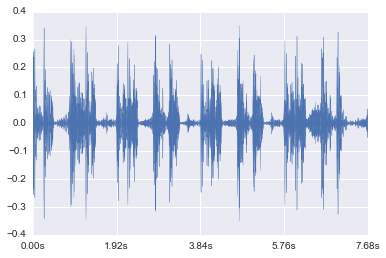

In [14]:
# Load in sound
x, fs = librosa.load('125_bounce.wav')
librosa.display.waveplot(x, fs)

In [15]:
from IPython.display import Audio
Audio(x, rate=fs)

In [18]:
def getOnsetTimes(x, fs):
    onset_frames = librosa.onset.onset_detect(x, fs)
    return librosa.frames_to_time(onset_frames, fs)

In [19]:
# TODO wuttt? understand this...
def estimatePitch(segment, fs, fmin=50.0, fmax=4000.0):
    i_min = fs/fmax
    i_max = fs/fmin
    r = librosa.autocorrelate(segment)
    r[:i_min] = 0
    r[i_max:] = 0
    i = r.argmax()
    f0 = float(fs)/i
    return f0

In [ ]:
def transcribeAudio(signal, fs):
    onsets = getOnsetTimes(signal_in, fs)
    notes = []
    defaultVelocity = 80
    defaultNoteLength = 0.1 #seconds
    
    for i in range(len(onsets)-1):
        n0 = int(onsets[i]*fs)
        n1 = int(onsets[i+1]*fs)
        estimatedPitch = estimatePitch(signal[n0:n1], fs, fmin=60, fmax=4000)
        
        notes.append(pm.Note(velocity=defaultVelocity,
                             pitch=estimatedPitch,
                             start=onsets[i],
                             end=onsets[i]+defaultNoteLength))
    return notes

In [ ]:
def doesAudioMatch(userSignal, answer):
    """
    Compare the midi and see if they match.
    There needs to be some error tolerance here.
    Also, the times won't match up exactly, there will be a linear shift.
    
    Args:
        userSignal -- Midi transcription of audio signal from user
        answer -- MIDI version of the Answer audio
    
    Returns:
        boolean result
    """
    return false

In [ ]:
def Run:
    """
    while (game is going)
        Generate a tone row or rhythm
        VO: Just a few preset rhythms
        manually coding
        from MIDI songs?
        V1: algorithmically generated
        beat n pitch, this will be funnnnnn
        Present the first tone
        Take in audio from mic
        MIR to determine if Input matches Control
        VO: Research pitch AND rhythm? which is easier? which is computationally less intensive? What MIR is needed here?
        If it matches
        tones++
        continue;
        If it doesn’t match
        Beep beep error!
        Retry logic -- do I BREAK / start back from Square 1, or do you get a few retries / CONTINUE?
    """